<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/06_Spectral_Mixture_Analysis.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 06 Spectral Mixture Analysis</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

Libraries to be used:

In [ ]:
import rasterio
import numpy as np
from scikeo.sma import sma
import matplotlib.pyplot as plt

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.0 Optical image

Landsat-8 OLI (Operational Land Imager) will be used. This image, which is in surface reflectance, contain bands:
- Blue -> B2
- Green -> B3
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

The image to be used can be downloaded [here](https://drive.google.com/file/d/1-_pE0U1RagI7k_Te-DiJ1k0ymOmpbEdV/view?usp=sharing):

## 3.0 Spectral Mixture Analysis (SMA)

Image path

In [ ]:
path_raster = r"F:\RepositoriosGitHub\scikit-eo-tutorials\data\03_sma\LC08_232066_20190727_SR.tif"
img = rasterio.open(path_raster)

Endmembers:
- Soil
- Forest
- Water

In [ ]:
# endmembers
endm =[[8980,8508,8704,13636,16579,11420], # soil
    [8207,7545,6548,16463,9725,6673], # forest
    [9276,9570,10089,6743,5220,5143], # water
    ]
endm = np.array(endm)
endm.shape

(3, 6)

Applying the ```sma``` function to obtain fractions.

In [ ]:
frac = sma(image = img, endmembers = endm)

Preparing the image before plotting

In [ ]:
# Normalizing fractions
def stretch_percentiles(arr):
    p10 = np.percentile(arr, 10) # percentile10
    p90 = np.percentile(arr, 90) # percentile90
    clipped_arr = np.clip(arr, p10, p90)
    img = (clipped_arr - p10)/(p90 - p10)
    return img

fractions = stretch_percentiles(frac)

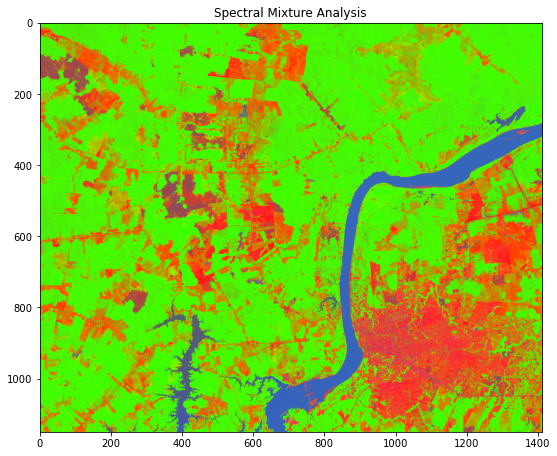

In [ ]:
# Let´s plot
fig, axes = plt.subplots(figsize = (9, 9))
axes.imshow(fractions)
axes.set_title("Spectral Mixture Analysis")
axes.grid(False)